In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

import time 
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.chrome.options import Options
from lxml import html
 

In [6]:

import pandas as pd
import numpy as np

In [3]:
s=Service(ChromeDriverManager().install())
chrome_options = Options()
driver = webdriver.Chrome(service=s, chrome_options=chrome_options)
driver.create_options()

driver.maximize_window()
driver.get('https://www.olx.com.eg/en/')




====== WebDriver manager ======
Current google-chrome version is 104.0.5112
Get LATEST chromedriver version for 104.0.5112 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/104.0.5112.79/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Osama Sabry\.wdm\drivers\chromedriver\win32\104.0.5112.79]
C:\Users\OSAMAS~1\AppData\Local\Temp/ipykernel_5828/32400459.py:3: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(service=s, chrome_options=chrome_options)


In [4]:
def olx_scraper(search_key,get_all_adv=True):
    """
    olx_sccraper is a scraping function for olx 
    search_key  : is the product you search for
    get_all_adv : is the option of getting all adv or specific num
    """
    driver.get('https://www.olx.com.eg/en/')

    
    
    
    
    Search =  driver.find_element(By.CSS_SELECTOR,"#body-wrapper > div > header > div > div._1e7904e8 > div > div > div._1075545d._1dc43551 > div > div.f6c2c5a2 > input")
    Search.click()
    Search.send_keys(search_key)
    Search.send_keys(Keys.RETURN)
    time.sleep(1)
    number_of_advv = driver.find_element(By.CLASS_NAME,"_76047990")
    num = number_of_advv.text
    num_1 =  int(''.join(filter(str.isdigit, num)))
    print('The Number of The Adv Found >> '+number_of_advv.text)

    if get_all_adv == False:
        number_of_adv = int(input('how many advertisments do you want ? '))
    
        
        
    products = []
    price = []
    places = []
    dates = []
    links = []
    prices =[]
    photoes =[]
    check = []
    pics_check = []
    index_pic =[]
    y=[]
    l=2
    while (l<1000):
        if num_1 < number_of_adv:
            print('we only have '+ num)
            break
        product_scr = driver.find_elements(By.CLASS_NAME,'a5112ca8')
        place       = driver.find_elements(By.CLASS_NAME,'_424bf2a8')
        pric        = driver.find_elements(By.CLASS_NAME,'_52497c97')
        link        = driver.find_elements(By.XPATH,'/html/body/div[*]/div/header[2]/div/div/div/div[2]/div[2]/div[2]/div/div[2]/ul[*]/li[*]/article/div[2]/a')
        date        = driver.find_elements(By.CLASS_NAME,'_2e28a695')
        photo       = driver.find_elements(By.XPATH,'/html/body/div[*]/div/header[2]/div/div/div/div[2]/div[2]/div[2]/div/div[2]/ul/li[*]/article/div[1]/picture/source')
        qw          = driver.find_elements(By.CLASS_NAME,'_41d2b9f3')
        fof         = driver.find_elements(By.CLASS_NAME,'d73e7494')
        checker     = driver.find_elements(By.XPATH,'/html/body/div[2]/div/header[2]/div/div/div/div[2]/div[2]/div[2]/div/div[2]/ul/li[*]')
        for product in product_scr:
            products.append(product.text)
        for p in pric:
            price.append(p.text)
        for ch in qw:
            check.append(ch.text)
        for plac   in place:
            places.append(plac.text )
        for lin in link:
            links.append(lin.get_attribute('href'))
        for dat in date:

            dates.append(dat.text)

        for j in photo:
            photoes.append(j.get_attribute('data-srcset'))
        for ch in checker:
            pics_check.append(ch.get_attribute('innerHTML'))
            

        if(l >= 3):
            if len(fof)==6:
                break
        if get_all_adv == False:
            if len(products) > number_of_adv:
                break


        



        driver.get(f"https://www.olx.com.eg/en/ads/q-{search_key}/?page={l}")
        print('products',    len(products))
        print('prices  ',    len(price))
        print('places'  ,    len(places))
        print('links'   ,    len(links))
        print('dates'   ,    len(dates))
        print('pics'    ,    len(photoes))
        print('index'   ,    len(check))
        print('*'*100)
        time.sleep(1)
        l =l +1


    for x in range(len(check)):
        if 'EGP'  not in check[x]:
            y.append(x)
    for ind in y:
        price.insert(ind,'null')
    for pk in pics_check:
        if '_6d80386f'   in pk:
            photoes.insert(pics_check.index(pk),'null')
    
    products = products[:number_of_adv]
    price    = price[:number_of_adv]
    places   = places[:number_of_adv]
    dates    = dates[:number_of_adv]
    links    = links[:number_of_adv]
    photoes  = photoes[:number_of_adv]

    dt = pd.DataFrame({'Product':products,'price':price,'location':places,'date':dates,'link':links,'image':photoes})   
    return dt
        


In [5]:
olx_scraper('iphone',False)

The Number of The Adv Found >> 12,823 ads
how many advertisments do you want ? 100
products 45
prices   42
places 45
links 45
dates 45
pics 45
index 45
****************************************************************************************************
products 90
prices   85
places 90
links 90
dates 90
pics 90
index 90
****************************************************************************************************


,Product,price,location,date,link,image
0,iPhone 13 pro max,"EGP 27,000NEGOTIABLE","Nasr City, Cairo•",5 days ago,https://www.olx.com.eg/en/ad/iphone-13-pro-max...,https://images.olx.com.eg/thumbnails/35191554-...
1,iPhone 11 Pro Max 256gb - الحق العروض اسعار وه...,"EGP 14,300","Sheikh Zayed, Giza•",3 days ago,https://www.olx.com.eg/en/ad/iphone-11-pro-max...,https://images.olx.com.eg/thumbnails/35418968-...
2,iphone 11 pro max 256gb كسر زيرو استعمال امريك...,"EGP 14,300","Nasr City, Cairo•",13 hours ago,https://www.olx.com.eg/en/ad/iphone-11-pro-max...,https://images.olx.com.eg/thumbnails/35631829-...
3,"ألحق قـبل نفاذ الكميـه "" iphone Xs Max "" بحـال...","EGP 10,850","Nasr City, Cairo•",4 days ago,https://www.olx.com.eg/en/ad/%D8%A3%D9%84%D8%A...,https://images.olx.com.eg/thumbnails/35361778-...
4,عروضنا مابتخلصش وكل يوم جديد ع ال IPHONE 7/7pl...,"EGP 6,100","Mohandessin, Giza•",2 days ago,https://www.olx.com.eg/en/ad/%D8%B9%D8%B1%D9%8...,https://images.olx.com.eg/thumbnails/33826406-...
...,...,...,...,...,...,...
95,iPhone X,"EGP 5,500NEGOTIABLE","Zagazig, Sharqia•",6 hours ago,https://www.olx.com.eg/en/ad/iphone-x-ID192938...,https://images.olx.com.eg/thumbnails/35675302-...
96,iPhone,"EGP 22,000","Glim, Alexandria•",6 hours ago,https://www.olx.com.eg/en/ad/iphone-ID19290399...,https://images.olx.com.eg/thumbnails/35502758-...
97,Iphone 7 32G,"EGP 3,000","New Cairo - El Tagamoa, Cairo•",6 hours ago,https://www.olx.com.eg/en/ad/iphone-7-32g-ID18...,https://images.olx.com.eg/thumbnails/11111122-...
98,iphone Xs max,"EGP 9,500NEGOTIABLE","Marsa Matrouh, Matruh•",6 hours ago,https://www.olx.com.eg/en/ad/iphone-xs-max-ID1...,https://images.olx.com.eg/thumbnails/35673597-...


In [61]:
driver.get('https://www.olx.com.eg/en/ads/q-iphone/')

fof [   ]  list is used to handle the next button
by checking the number of pages option you have 
at first and last page there are the options
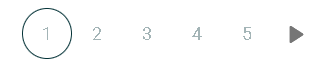

so if the pages options is more than 6 it will keep going next and this codition only starts after the first page
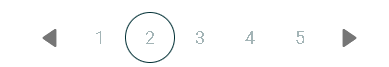

qw[  ] list is used to check the adv without price then i get the index of these nulls from it and go and insert them at the prices list
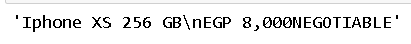
        

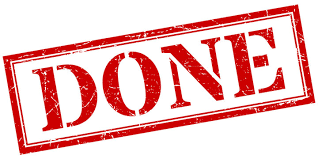